# Kopp21 et al 2021 Exploratory Data Analysis
**Authorship:**
Adam Klie (last updated: *06/10/2023*)
***
**Description:**
This notebook is meant to be a quick exploratory data analysis of the Kopp21 et al (2021) dataset. The goal is to get a feel for the data and to identify any issues that may need to be addressed before we can begin to analyze the data.
***

In [1]:
# General imports
import os
import sys
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# EUGENe imports
import eugene as eu
from eugene import plot as pl
from eugene import settings
settings.dataset_dir = "/cellar/users/aklie/data/eugene/revision/kopp21"

# EUGENe packages
import seqdatasets
import seqdata as sd
import seqpro as sp

# Print versions
print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Xarray version: {xr.__version__}")
print(f"Eugene version: {eu.__version__}")
print(f"SeqDatasets version: {seqdatasets.__version__}")
print(f"SeqData version: {sd.__version__}")
print(f"SeqPro version: {sp.__version__}")

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Python version: 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:39:03) 
[GCC 11.3.0]
NumPy version: 1.23.5
Pandas version: 1.5.2
Xarray version: 2023.4.0
Eugene version: 0.0.8
SeqDatasets version: 0.0.1
SeqData version: 0.0.1
SeqPro version: None


# Data Extraction

In [2]:
sdata = sd.open_zarr(os.path.join(settings.dataset_dir, 'kopp21.zarr'))
sdata

<xarray.Dataset>
Dimensions:     (_sequence: 1013080, cov_sample: 1, _length: 500)
Coordinates:
  * cov_sample  (cov_sample) object 'stam'
Dimensions without coordinates: _sequence, _length
Data variables:
    chrom       (_sequence) object dask.array<chunksize=(63318,), meta=np.ndarray>
    chromEnd    (_sequence) int64 dask.array<chunksize=(63318,), meta=np.ndarray>
    chromStart  (_sequence) int64 dask.array<chunksize=(63318,), meta=np.ndarray>
    cov         (_sequence, cov_sample, _length) uint16 dask.array<chunksize=(4096, 1, 500), meta=np.ndarray>
    seq         (_sequence, _length) |S1 dask.array<chunksize=(4096, 500), meta=np.ndarray>
    strand      (_sequence) object dask.array<chunksize=(63318,), meta=np.ndarray>
Attributes:
    length_dim:    _length
    max_jitter:    0
    sequence_dim:  _sequence

In [6]:
sdata["seq_len"] = xr.DataArray(sp.length(sdata['seq'].values), dims=["_sequence"])

In [2]:
sdata = eu.dl.read_h5sd(
    filename=os.path.join(eu.settings.dataset_dir, "kopp21", "junD", "jund_processed.h5sd"),
)
sdata

SeqData object with = 1013080 seqs
seqs = (1013080,)
names = (1013080,)
rev_seqs = (1013080,)
ohe_seqs = (1013080, 500, 4)
ohe_rev_seqs = (1013080, 500, 4)
seqs_annot: 'chr', 'end', 'seq_len', 'start', 'target'
pos_annot: None
seqsm: None
uns: None

# Data Visualization

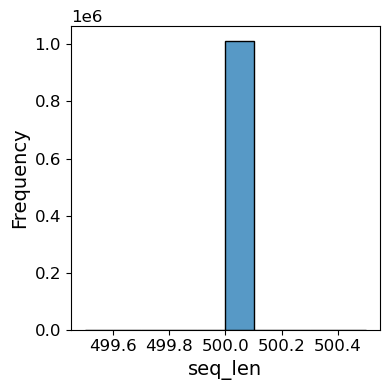

In [7]:
# Double check that the sequences are the same length
pl.histplot(
    sdata, 
    keys="seq_len", 
    orient="h",
    bins=10,
    figsize=(4,4)
)

In [12]:
def Set_Chr_Nr_ (Chr):
    """ Sort by chromosome """
    if Chr: 
        New = Chr[3:]
        if New == 'X': New = 23
        elif New == 'Y': New = 24
        elif New == 'M': New = 25
        else: New = int(New)
    else:
        New = 0
    return New
ord = sorted(np.unique(sdata["chrom"].values), key=lambda x: Set_Chr_Nr_(x))

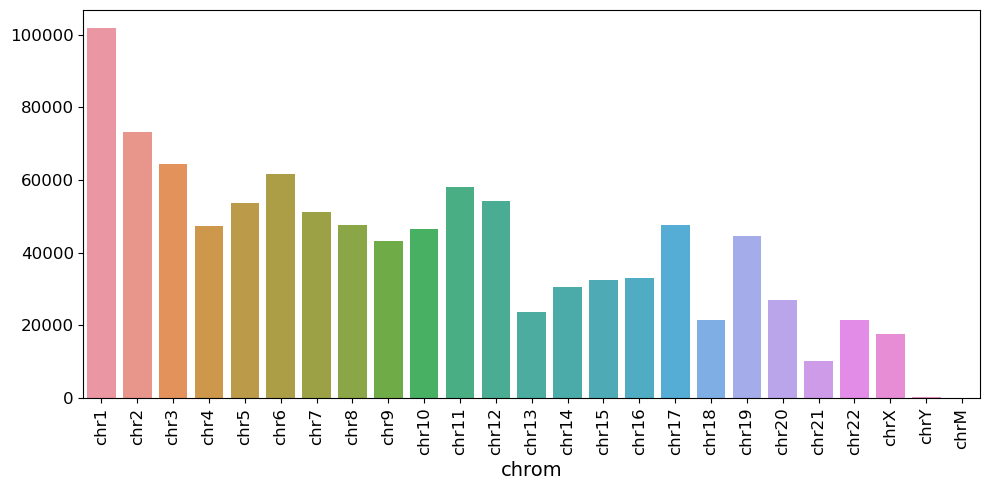

In [13]:
# Check the distribution of sequences on chromosomes
pl.countplot(
    sdata,
    keys="chrom",
    xtick_rot=90,
    order=ord
)

# DONE!

---

# Scratch